In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import radians, cos, sin, asin, sqrt
from haversine import haversine
import folium
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [219]:
#Define Haversine formula
#Inputs are the coordinates of two points, lon1, lat1, lon2, lat2
#Returns the distance between them

def haversine(lon1, lat1, lon2, lat2):
    """
     Calculate the great circle distance in kilometers between two points  on the earth (specified in decimal degrees)
    """

   
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
   
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r 

#Read data
#This is a Phyphox GPS measurement. Walking short distance outside.

data = pd.read_csv('GPS_data.csv')
data.head()


,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


In [220]:
# In this cell, it shows the map of movement

location_frame = data[['latitude', 'longitude']]
location_list = location_frame.values.tolist() #create list from the frame

ave_lat = np.mean(location_list, axis = 0)[0]
ave_lon = np.mean(location_list, axis = 0)[1]

#Load map centered on average coordinates
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)

#Draw lines of motion
folium.PolyLine(location_list, color="red", weight=2.5, opacity=1).add_to(my_map)

#save map
my_map.save("map.html")
my_map

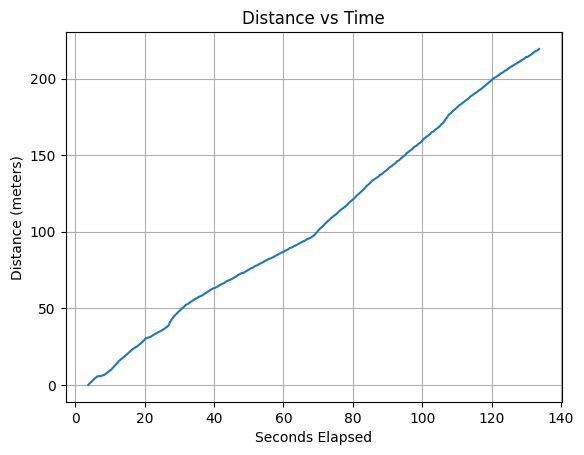

In [221]:
# In this cell, it shows the distance graph

# Initialize list for distance graph
distances = [0]

# Iterate through data to compute distances
for i in range(1, len(df)):
    # Use geopy library to calculate distance between latitude and longitude coordinates
    coords1 = (df['latitude'][i-1], df['longitude'][i-1])
    coords2 = (df['latitude'][i], df['longitude'][i])
    distance = geodesic(coords1, coords2).meters
    # Accumulate distance to the list
    distances.append(distances[-1] + distance)

# Add distance column to the DataFrame
df['distance'] = distances

# Plot distance graph
plt.plot(df['seconds_elapsed'], df['distance'])
plt.grid()
plt.xlabel('Seconds Elapsed')
plt.ylabel('Distance (meters)')
plt.title('Distance vs Time')
plt.show()

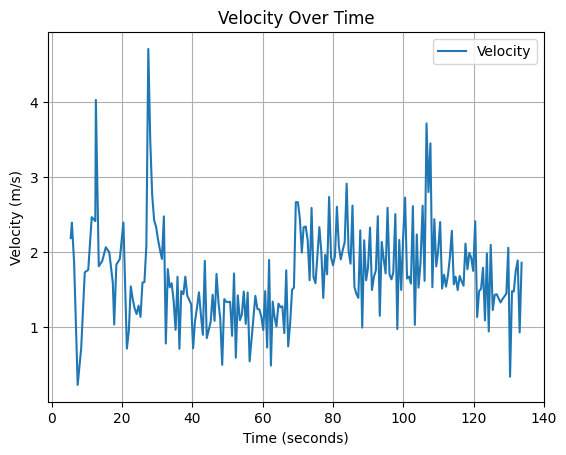

In [222]:
# In this cell, the velocity is shown

# Read CSV file
df = pd.read_csv('GPS_data.csv')

# Calculate distance and store it in a new column 'distance'
df['distance'] = 0.0
for i in range(1, len(df)):
    coords_1 = (df['latitude'][i-1], df['longitude'][i-1])
    coords_2 = (df['latitude'][i], df['longitude'][i])
    distance = geodesic(coords_1, coords_2).meters
    df.at[i, 'distance'] = distance

# Calculate velocity and store it in a new column 'velocity'
df['time_diff'] = df['seconds_elapsed'].diff()
df['velocity'] = df['distance'] / df['time_diff']

# Calculate acceleration from speed and store it in a new column 'calculated_acceleration'
df['calculated_acceleration'] = df['velocity'].diff() / df['time_diff']

# Plot velocity graph
plt.plot(df['seconds_elapsed'], df['velocity'], label='Velocity')
plt.grid()
plt.xlabel('Time (seconds)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity Over Time')
plt.legend()
plt.show()



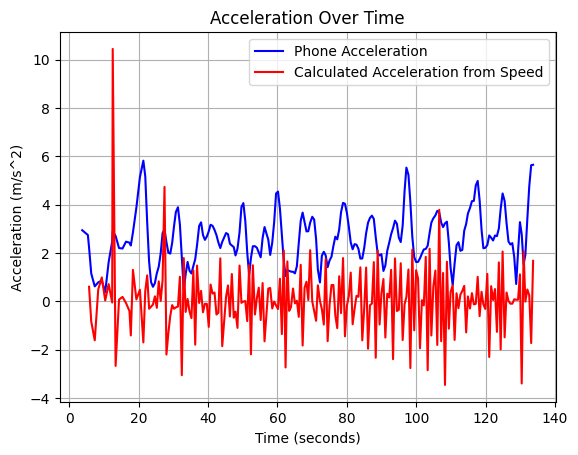

In [223]:
#In this cell, the acceleration is shown
# Calculate magnitude of acceleration
df['magnitude'] = np.sqrt(acceleration['x']**2 + acceleration['y']**2 + acceleration['z']**2)

# Plot acceleration graph for each component
plt.plot(df['seconds_elapsed'], df['magnitude'], label='Phone Acceleration', color='blue')
plt.plot(df['seconds_elapsed'], df['calculated_acceleration'], label='Calculated Acceleration from Speed', color='red')
plt.grid()
plt.xlabel('Time (seconds)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Over Time')
plt.legend()
plt.show()

In [224]:
# In this cell, the average speed is calculated

# Read CSV file
df = pd.read_csv('GPS_data.csv')

# Initialize list for distance graph
distances = [0]

# Iterate through data to compute distances
for i in range(1, len(df)):
    #  # Use geopy library to calculate distance between latitude and longitude coordinates
    coords1 = (df['latitude'][i-1], df['longitude'][i-1])
    coords2 = (df['latitude'][i], df['longitude'][i])
    distance = geodesic(coords1, coords2).meters
    # Accumulate distance to the list
    distances.append(distances[-1] + distance)

# Add distance column to the DataFrame
df['distance'] = distances

# Calculate total time and total distance
total_time = df['seconds_elapsed'].iloc[-1] - df['seconds_elapsed'].iloc[0]
total_distance = df['distance'].iloc[-1]

# Calculate average speed
average_speed = total_distance / total_time

# Print average speed
print(f"The average speed is {average_speed:.2f} meters per second.")


The average speed is 1.69 meters per second.


In [225]:
# In this cell, traveled distance is calculated
# Read CSV file
df = pd.read_csv('GPS_data.csv')

# Initialize list for distance graph
distances = [0]

# Iterate through data to compute distances
for i in range(1, len(df)):
    # Use geopy library to calculate distance between latitude and longitude coordinates
    coords1 = (df['latitude'][i-1], df['longitude'][i-1])
    coords2 = (df['latitude'][i], df['longitude'][i])
    distance = geodesic(coords1, coords2).meters
    # Accumulate distance to the list
    distances.append(distances[-1] + distance)

# Add distance column to the DataFrame
df['distance'] = distances

# Get total distance
total_distance = df['distance'].iloc[-1]

# Print total distance
print(f"The total distance is {total_distance:.2f} meters.")

The total distance is 219.34 meters.


In [226]:
# In this cell, the number of steps is calculated

# Read accelerometer data from CSV file
data = pd.read_csv('Acceleration_data.csv')

# Calculate the sum of absolute values for each component (x, y, z)
sum_x = data['x'].abs().sum()
sum_y = data['y'].abs().sum()
sum_z = data['z'].abs().sum()

# Determine the component with the highest absolute sum
if sum_x >= sum_y and sum_x >= sum_z:
    best_component = 'x'
elif sum_y >= sum_x and sum_y >= sum_z:
    best_component = 'y'
else:
    best_component = 'z'

# Print the best component
print(f"The best component is {best_component}.")

# Define Butterworth low-pass filter functions
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Parameters for the filter
order = 6
fs = 30
cutoff = 1.5

# Apply low-pass filter to the best component data
stepdata = butter_lowpass_filter(data[best_component], cutoff, fs, order)

# Convert stepdata to NumPy array
stepdata = np.array(stepdata)

# Count steps
steps = 0
for i in range(len(stepdata) - 1):
    if stepdata[i] * stepdata[i + 1] < 0:
        steps += 0.5  # Increment steps by 0.5 when the signal changes direction
steps = int(steps)  # Convert steps to integer
print(f"The number of steps is {steps}.")  # Print the number of steps


The best component is z.
The number of steps is 256.


Q1:Does the acceleration calculated from the speed match the observed acceleration? What differences do you notice? What could be their cause?

The acceleration we figure out from speed and what we see from the phone's sensors are quite different. The sensor-based acceleration, like when the phone's in a pocket, includes lots of bumps and background noise. But the calculated acceleration shows the body's general movement, filtering out much of that noise. Basically, what we see from the sensor mostly reflects the phone's movement, while the calculated acceleration shows the whole body's motion. These differences happen because the data sources and how we do the math are not the same.


Q2:Is the number of steps logical?

Yes, considering the total distance covered (219.34 meters), the number of steps (256) appears reasonable.This estimate matches the average length of steps people typically take. But variations in step length and speed can affect the exact count of steps.